# Bank Loan Project

In [94]:
# problem description: to predict whether someone will get an interest rate of 9% or lower
# result 1 = get the loan with interest 9% or lower; 0 = get the loan with interest higher than 9%

In [95]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn

# Load Data

In [96]:
df = pd.read_csv('loan.csv')
df.head(3)

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670.0,36,4891.67,6000
11,19.72,670.0,36,3575.00,2000
12,14.27,665.0,36,4250.00,10625


# EDA

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 117.2 KB


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2497.0,13.067521,4.180074,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.870348,35.029051,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


In [99]:
##(df['Interest.Rate'] < 9).astype('uint8')

In [100]:
df = df[~df['Interest.Rate'].isna()]
df = df[~df['FICO.Score'].isna()]
df = df[~df['Monthly.Income'].isna()]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2492 non-null float64
FICO.Score        2492 non-null float64
Loan.Length       2492 non-null int64
Monthly.Income    2492 non-null float64
Loan.Amount       2492 non-null int64
dtypes: float64(3), int64(2)
memory usage: 116.8 KB


In [102]:
df['getLoan'] = ((df['Interest.Rate'] < 9).astype('uint8'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001294E8ABF28>,
      dtype=object)

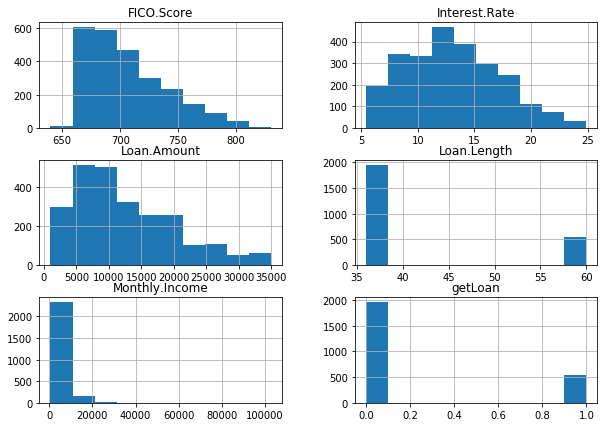

In [103]:
df.hist(bins= 10, figsize = (10, 7))

In [104]:
# crosstab
ctab = pd.crosstab(df.getLoan, [df['Loan.Length']], rownames =['getLoan'], colnames = ['LoanLenght'])
ctab

LoanLenght,36,60
getLoan,,
0,1430,529
1,514,19


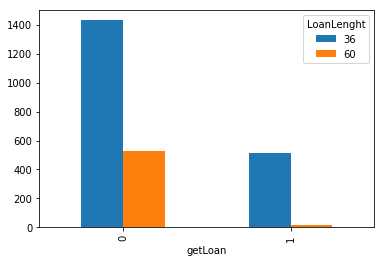

In [105]:
ctab.plot(kind = "bar")

In [106]:
# imbalance class
(df['Interest.Rate'] < 9).astype('uint8').sum() / df['Interest.Rate'].size
df.getLoan.sum()/df.getLoan.size, (df.getLoan.size - df.getLoan.sum())/df.getLoan.size

(0.213884430176565, 0.786115569823435)

# Split and Scale 

In [107]:
y = df.pop('getLoan')
X = df[['FICO.Score', 'Loan.Length', 'Monthly.Income', 'Loan.Amount']]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [110]:
###print('\n'.join(sklearn.metrics.SCORERS.keys()))

# Gridsearch

In [112]:
params = {
          'penalty': ['l2'], 
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.2230... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

# Results

In [113]:
gs.best_estimator_

LogisticRegression(C=0.868511373751352, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

# Final Model

In [114]:
gs.best_params_

{'C': 0.868511373751352,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'saga'}

In [115]:
model = LogisticRegression(**gs.best_params_).fit(X_train, y_train)

In [116]:
y_hat = model.predict(X_test)
p_hat = model.predict_proba(X_test)[:,1]

In [117]:
log_loss(y_test, p_hat)

0.23759469490415433

In [118]:
baseline = 1 - (y_test.sum() / y_test.size)
accuracy = accuracy_score(y_test, y_hat)
baseline, accuracy

(0.7679222357229647, 0.8918590522478737)

In [119]:
# TP / (TP + FP) # type 1 errors
precision_score(y_test, y_hat)

0.81875

In [120]:
# TP / (TP + FN) # type 2 errors --- focus on increasing this number
recall_score(y_test, y_hat)

0.6858638743455497

# ROC Curve

In [121]:
auc = roc_auc_score(y_test, p_hat)
auc

0.9536665783020745

In [122]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

2.00 0.00 0.00
1.00 0.00 0.01
0.99 0.00 0.09
0.99 0.00 0.09
0.95 0.00 0.20
0.94 0.00 0.20
0.87 0.00 0.32
0.87 0.00 0.32
0.87 0.00 0.34
0.87 0.01 0.34
0.87 0.01 0.34
0.86 0.01 0.34
0.86 0.01 0.35
0.85 0.01 0.35
0.81 0.01 0.39
0.80 0.02 0.39
0.77 0.02 0.41
0.76 0.02 0.41
0.72 0.02 0.46
0.71 0.02 0.46
0.70 0.02 0.46
0.70 0.02 0.46
0.68 0.02 0.49
0.68 0.02 0.49
0.65 0.02 0.52
0.65 0.03 0.52
0.65 0.03 0.53
0.64 0.03 0.53
0.64 0.03 0.53
0.63 0.03 0.53
0.59 0.03 0.58
0.59 0.03 0.58
0.57 0.03 0.59
0.56 0.04 0.59
0.55 0.04 0.61
0.55 0.04 0.61
0.55 0.04 0.61
0.55 0.04 0.61
0.53 0.04 0.65
0.53 0.04 0.65
0.51 0.04 0.68
0.51 0.04 0.68
0.51 0.04 0.69
0.50 0.05 0.69
0.48 0.05 0.73
0.48 0.05 0.73
0.47 0.05 0.74
0.44 0.05 0.74
0.44 0.05 0.75
0.44 0.06 0.75
0.44 0.06 0.75
0.43 0.06 0.75
0.43 0.06 0.76
0.43 0.06 0.76
0.41 0.06 0.79
0.41 0.06 0.79
0.41 0.06 0.79
0.41 0.06 0.79
0.40 0.06 0.80
0.40 0.06 0.80
0.39 0.06 0.81
0.37 0.07 0.81
0.37 0.07 0.81
0.36 0.07 0.81
0.36 0.07 0.82
0.35 0.08 0.82
0.35 0.08 

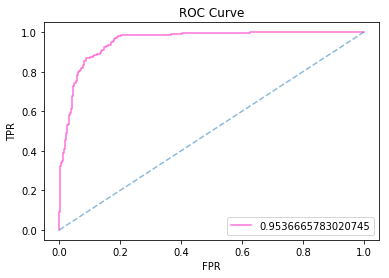

In [123]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()